
# 📊 Time Series Analysis — Stock Market Example

## Introduction

**Time Series Data** is a sequence of data points collected or recorded at specific time intervals.  
In finance, time series data examples include:
- Daily stock prices
- Monthly sales
- Quarterly GDP growth

A **time series** has two main components:
1. **Timestamp (t)** — represents the time of observation  
2. **Value (y_t)** — represents the observed data at that time

Mathematically:
\[
Y_t = f(t)
\]

---

## 📈 Characteristics of Time Series

1. **Trend** — The long-term movement in data (upward/downward).
2. **Seasonality** — Regular repeating patterns (e.g., monthly, yearly).
3. **Cyclic Behavior** — Irregular cycles due to economic or market conditions.
4. **Noise** — Random fluctuations not explained by model structure.
5. **Stationarity** — Mean and variance are constant over time.

---

In this notebook, we'll analyze **Apple (AAPL)** stock prices, visualize time series components, and forecast using:
- **Moving Average**
- **Exponential Smoothing**


In [13]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('seaborn-v0_8-darkgrid')
import warnings
warnings.filterwarnings('ignore')

# Download Apple stock data
data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538551,72.598930,71.292341,71.545927,135480400
2020-01-03,71.833290,72.594055,71.608685,71.765667,146322800
2020-01-06,72.405670,72.444313,70.703005,70.954181,118387200
2020-01-07,72.065155,72.671348,71.845377,72.415345,108872000
2020-01-08,73.224426,73.526318,71.768101,71.768101,132079200


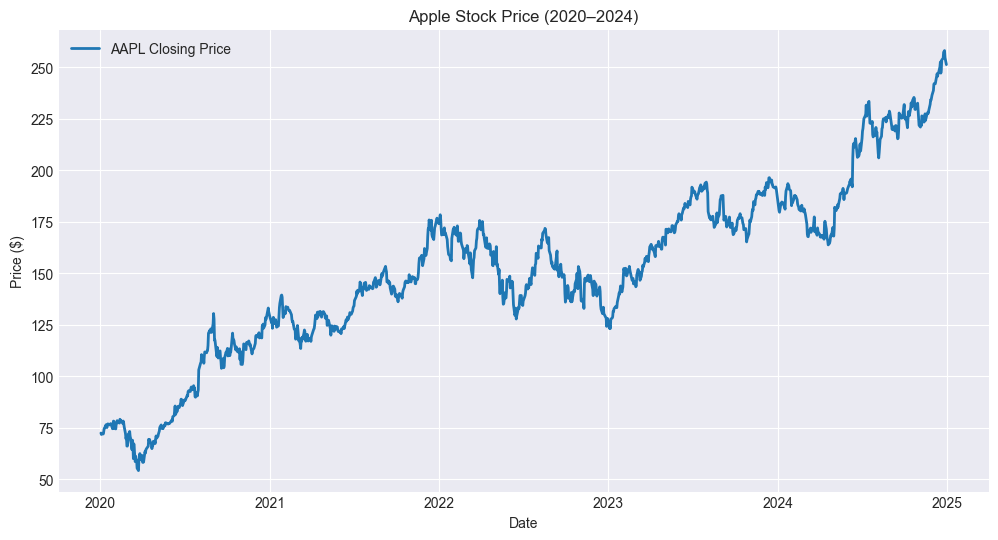

In [14]:

# Plot the closing price
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='AAPL Closing Price', linewidth=2)
plt.title('Apple Stock Price (2020–2024)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()



### Observation:
The graph shows Apple’s daily closing prices over time.  
We can observe:
- An upward **trend** from 2020 to 2024.
- Short-term fluctuations (market volatility).



## 📏 Moving Average (MA) Smoothing

**Concept:**
The **Moving Average** method smooths short-term fluctuations to identify long-term trends.

<script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>

Formula:

$$MA_t = \frac{1}{n} \sum_{i=0}^{n-1} y_{t-i}$$


Where:
- \( MA_t \) = moving average at time *t*
- \( n \) = window size (number of past observations)
- \( y_t \) = observed value at time *t*

We'll compute:
- 7-day Moving Average
- 30-day Moving Average


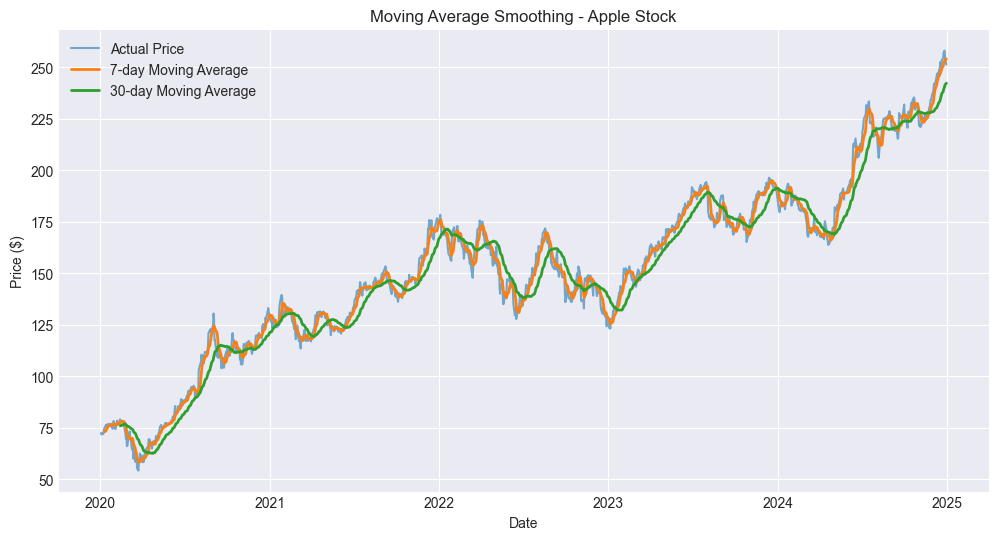

In [15]:

# Compute moving averages
data['MA_7'] = data['Close'].rolling(window=7).mean()
data['MA_30'] = data['Close'].rolling(window=30).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Actual Price', alpha=0.6)
plt.plot(data['MA_7'], label='7-day Moving Average', linewidth=2)
plt.plot(data['MA_30'], label='30-day Moving Average', linewidth=2)
plt.title('Moving Average Smoothing - Apple Stock')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()



## 🔮 Simple Exponential Smoothing (SES)

**Concept:**
Unlike moving average, **Exponential Smoothing** gives **more weight to recent observations**.

<script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>

Formula:

$$S_t = \alpha Y_t + (1 - \alpha) S_{t-1}$$


Where:
- \( S_t \) = smoothed value at time *t*
- \( Y_t \) = actual value
- \( \alpha \) = smoothing parameter (0 < α < 1)


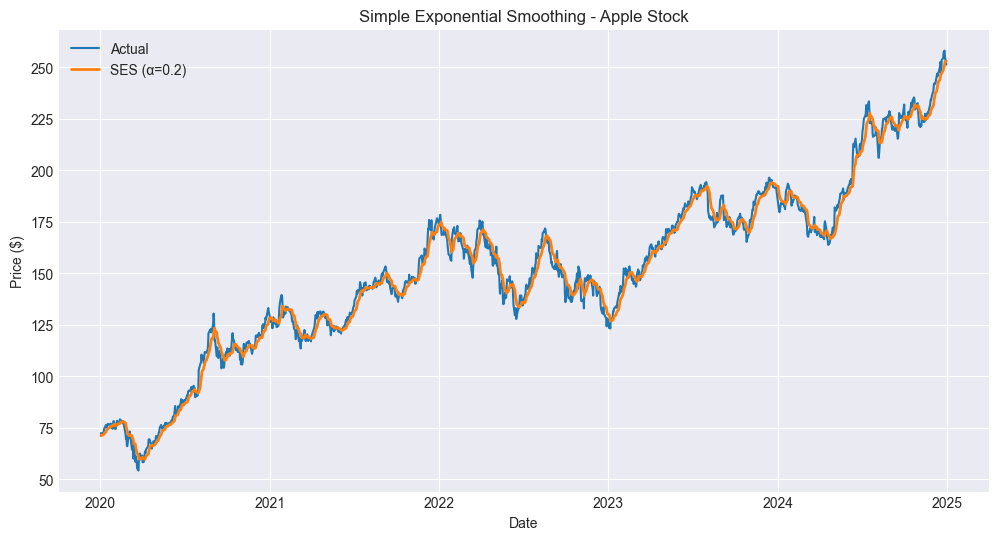

In [16]:

# Select closing price
y = data['Close']

# Fit Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(y, initialization_method="heuristic").fit(smoothing_level=0.2, optimized=False)
data['SES_0.2'] = ses_model.fittedvalues

# Plot
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Actual')
plt.plot(data['SES_0.2'], label='SES (α=0.2)', linewidth=2)
plt.title('Simple Exponential Smoothing - Apple Stock')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()



## ⚡ Holt’s Linear Trend Method

**Concept:**
Holt’s method extends SES by including a **trend** component.

Formulas:
\[
\begin{align}
L_t &= \alpha Y_t + (1 - \alpha)(L_{t-1} + T_{t-1}) \\
T_t &= \beta (L_t - L_{t-1}) + (1 - \beta) T_{t-1} \\
\hat{Y}_{t+h} &= L_t + hT_t
\end{align}
\]

Where:
- \( L_t \): Level
- \( T_t \): Trend
- \( \hat{Y}_{t+h} \): Forecast for h steps ahead

[*********************100%***********************]  1 of 1 completed


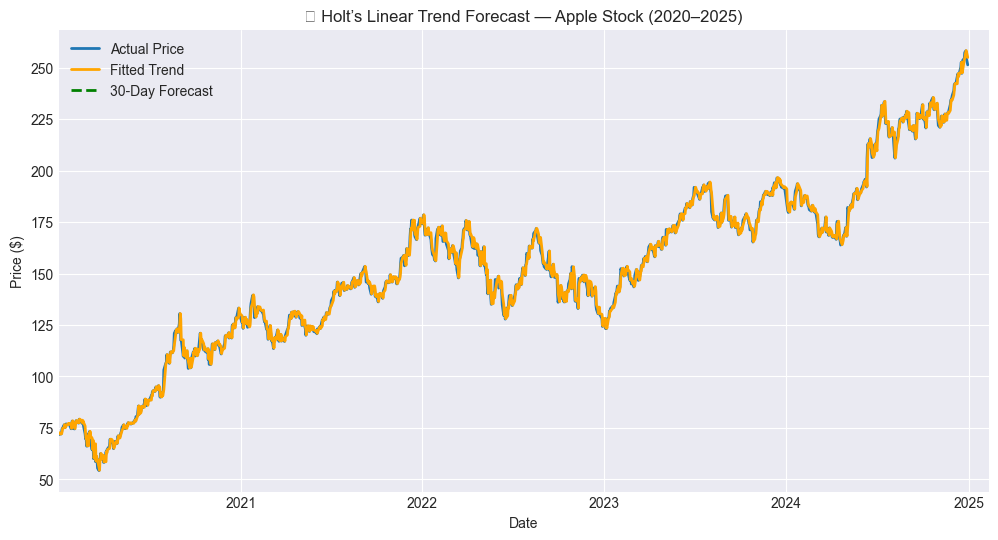

In [17]:
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
import pandas as pd
import yfinance as yf

# Download data again for safety
data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
y = data['Close']

# Fit Holt’s Linear Trend model
holt_model = ExponentialSmoothing(y, trend='add', initialization_method="estimated").fit()

# Forecast for next 30 days
forecast = holt_model.forecast(30)

# Combine historical and forecast data
forecast_index = pd.date_range(start=y.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
forecast = pd.Series(forecast, index=forecast_index)

# Plot the full chart correctly
plt.figure(figsize=(12,6))
plt.plot(y.index, y, label='Actual Price', linewidth=2)
plt.plot(y.index, holt_model.fittedvalues, label='Fitted Trend', color='orange', linewidth=2)
plt.plot(forecast.index, forecast, label='30-Day Forecast', linestyle='--', color='green', linewidth=2)

plt.title('📈 Holt’s Linear Trend Forecast — Apple Stock (2020–2025)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.xlim(y.index.min(), forecast.index.max())  # Ensure correct axis range
plt.grid(True)
plt.show()



Alpha (α)

High α (close to 1):
→ The model gives more weight to recent observations.
→ It reacts quickly to sudden market movements (good for volatile data).

Low α (close to 0):
→ The model gives more weight to older values, producing smoother forecasts.
→ Good when you want to ignore short-term fluctuations.

🔹 Beta (β)

High β (close to 1):
→ The trend component adjusts rapidly to changes in direction (e.g., price reversal).

Low β (close to 0):
→ The trend changes slowly, assuming the slope remains stable.

How Are α and β Calculated?
🔸 Method: Optimization via Error Minimization

In real applications, we don’t manually set α and β.
They’re determined automatically by minimizing the forecast error on training data.

The most common optimization criterion is to minimize the Sum of Squared Errors (SSE):


The algorithm tries different combinations of α and β (between 0 and 1) and selects the pair that gives the lowest SSE.

This optimization is handled internally by statistical packages like statsmodels.

In [18]:
import yfinance as yf
from statsmodels.tsa.api import ExponentialSmoothing

# Download Apple stock data
data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
y = data['Close']

# Fit Holt’s Linear Trend model (optimized)
holt_model = ExponentialSmoothing(y, trend='add', initialization_method="estimated").fit()

# Display optimized parameters
alpha = holt_model.params['smoothing_level']
beta = holt_model.params['smoothing_trend']

print(f"Optimal α (Level Smoothing): {alpha:.4f}")
print(f"Optimal β (Trend Smoothing): {beta:.4f}")


[*********************100%***********************]  1 of 1 completed


Optimal α (Level Smoothing): 0.9833
Optimal β (Trend Smoothing): 0.0000


Mean Squared Error: 246.70
Mean Absolute Error: 13.25


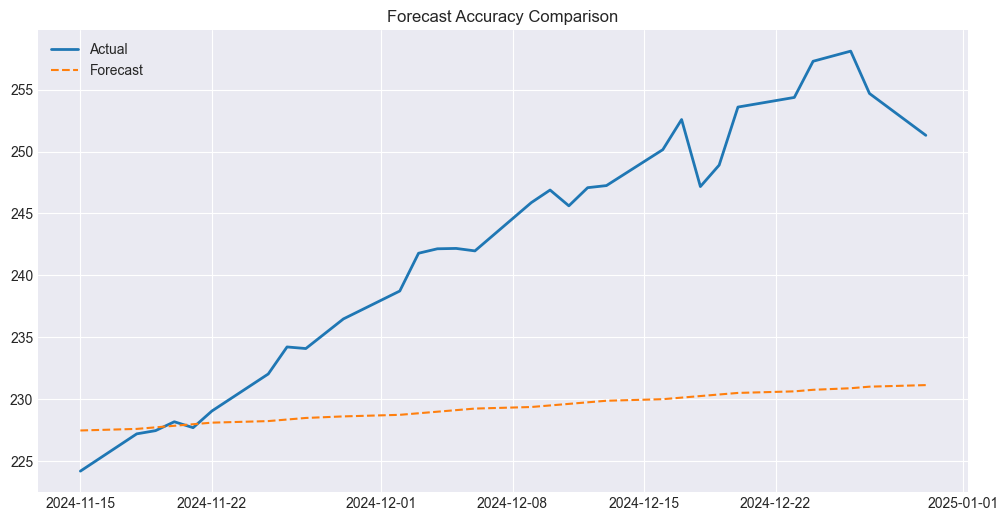

In [19]:

# Split data
train = y[:-30]
test = y[-30:]

# Fit model on training data
holt_model_train = ExponentialSmoothing(train, trend='add', initialization_method="estimated").fit()
forecast_test = holt_model_train.forecast(30)

# Compute metrics
mse = mean_squared_error(test, forecast_test)
mae = mean_absolute_error(test, forecast_test)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

# Compare actual vs forecast
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Actual', linewidth=2)
plt.plot(test.index, forecast_test, label='Forecast', linestyle='--')
plt.title('Forecast Accuracy Comparison')
plt.legend()
plt.show()


| Parameter       | Symbol | Meaning                                  | Effect                             |
| --------------- | ------ | ---------------------------------------- | ---------------------------------- |
| Level Smoothing | α      | Controls sensitivity to recent values    | Higher α = faster reaction         |
| Trend Smoothing | β      | Controls sensitivity to slope changes    | Higher β = faster trend adaptation |
| Estimation      | —      | Found by minimizing forecast error (SSE) | Done automatically by `.fit()`     |


## 📋 Summary — Comparison of Methods

| Method | Captures Trend | Captures Seasonality | Reacts to Changes | Use Case |
|---------|----------------|----------------------|------------------|-----------|
| Moving Average | ❌ | ❌ | Low | Simple smoothing |
| Simple Exponential Smoothing | ✅ (partial) | ❌ | Medium | Short-term trend |
| Holt’s Exponential Smoothing | ✅ | ❌ | High | Trend forecasting |

**Key Takeaway:**
- For short-term trend identification, **Moving Average** is sufficient.  
- For forecasting, **Holt’s method** provides a more realistic trend projection.



# ✅ Conclusion

In this notebook, we:
- Understood **Time Series characteristics**
- Smoothed data using **Moving Averages**
- Forecasted trends using **Exponential Smoothing**
- Evaluated accuracy of our forecasts

📍 Next Steps:
- Explore **Holt-Winters** for seasonality.
- Try **ARIMA / Prophet** for advanced forecasting.
